# "Project- Understanding the Attrition in HR"

***Project Description:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

***HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes

****Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

***Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers



In [1]:
from scipy.stats import boxcox
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r"C:\Users\USER\Desktop\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [ ]:
# Exploratory Data Analysis(EDA)

In [7]:
df.shape

(1470, 35)

In [9]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
# Dropping variables: EmployeeCount, Over18, StandardHours from the dataset

In [62]:
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'],inplace=True)

In [63]:
df.shape

(1470, 32)

In [64]:
# checking the columns of dataset
df.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [65]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany      

There are two different Data type (int64,oblect)

Checking null values

In [67]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [68]:
df.isnull().sum().sum()

0

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [ ]:
# VISULIASING HEAT MAP

<Axes: >

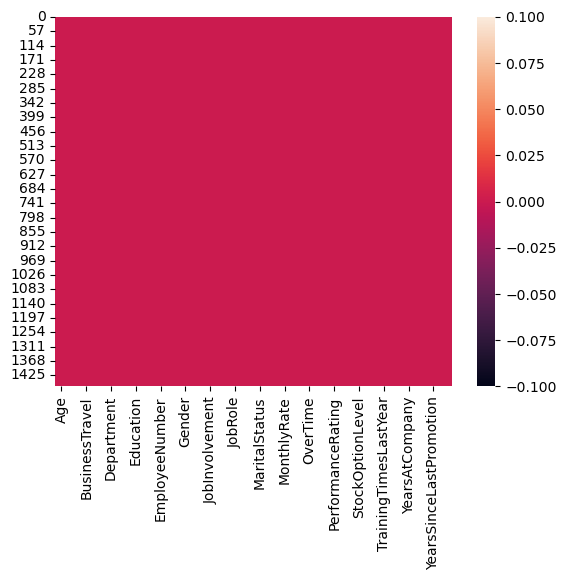

In [70]:
sns.heatmap(df.isnull())

In [71]:
# Numerical variables
Numr=['Age','DailyRate',
       'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction','HourlyRate',
       'JobInvolvement', 'JobLevel','JobSatisfaction',
      'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction','StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']


In [72]:

# Categorical variables
Catgr=['Attrition', 'BusinessTravel', 'Department', 'EducationField', 
             'Gender', 'JobRole', 'MaritalStatus','OverTime']

There are '24' numerical and '08' categorical.

Explore Data Distribution

Visualize the distribution of numerical variables using histograms or kernel density plots. Check for skewness and outliers in numerical variables. Explore the distribution of categorical variables using countplots.

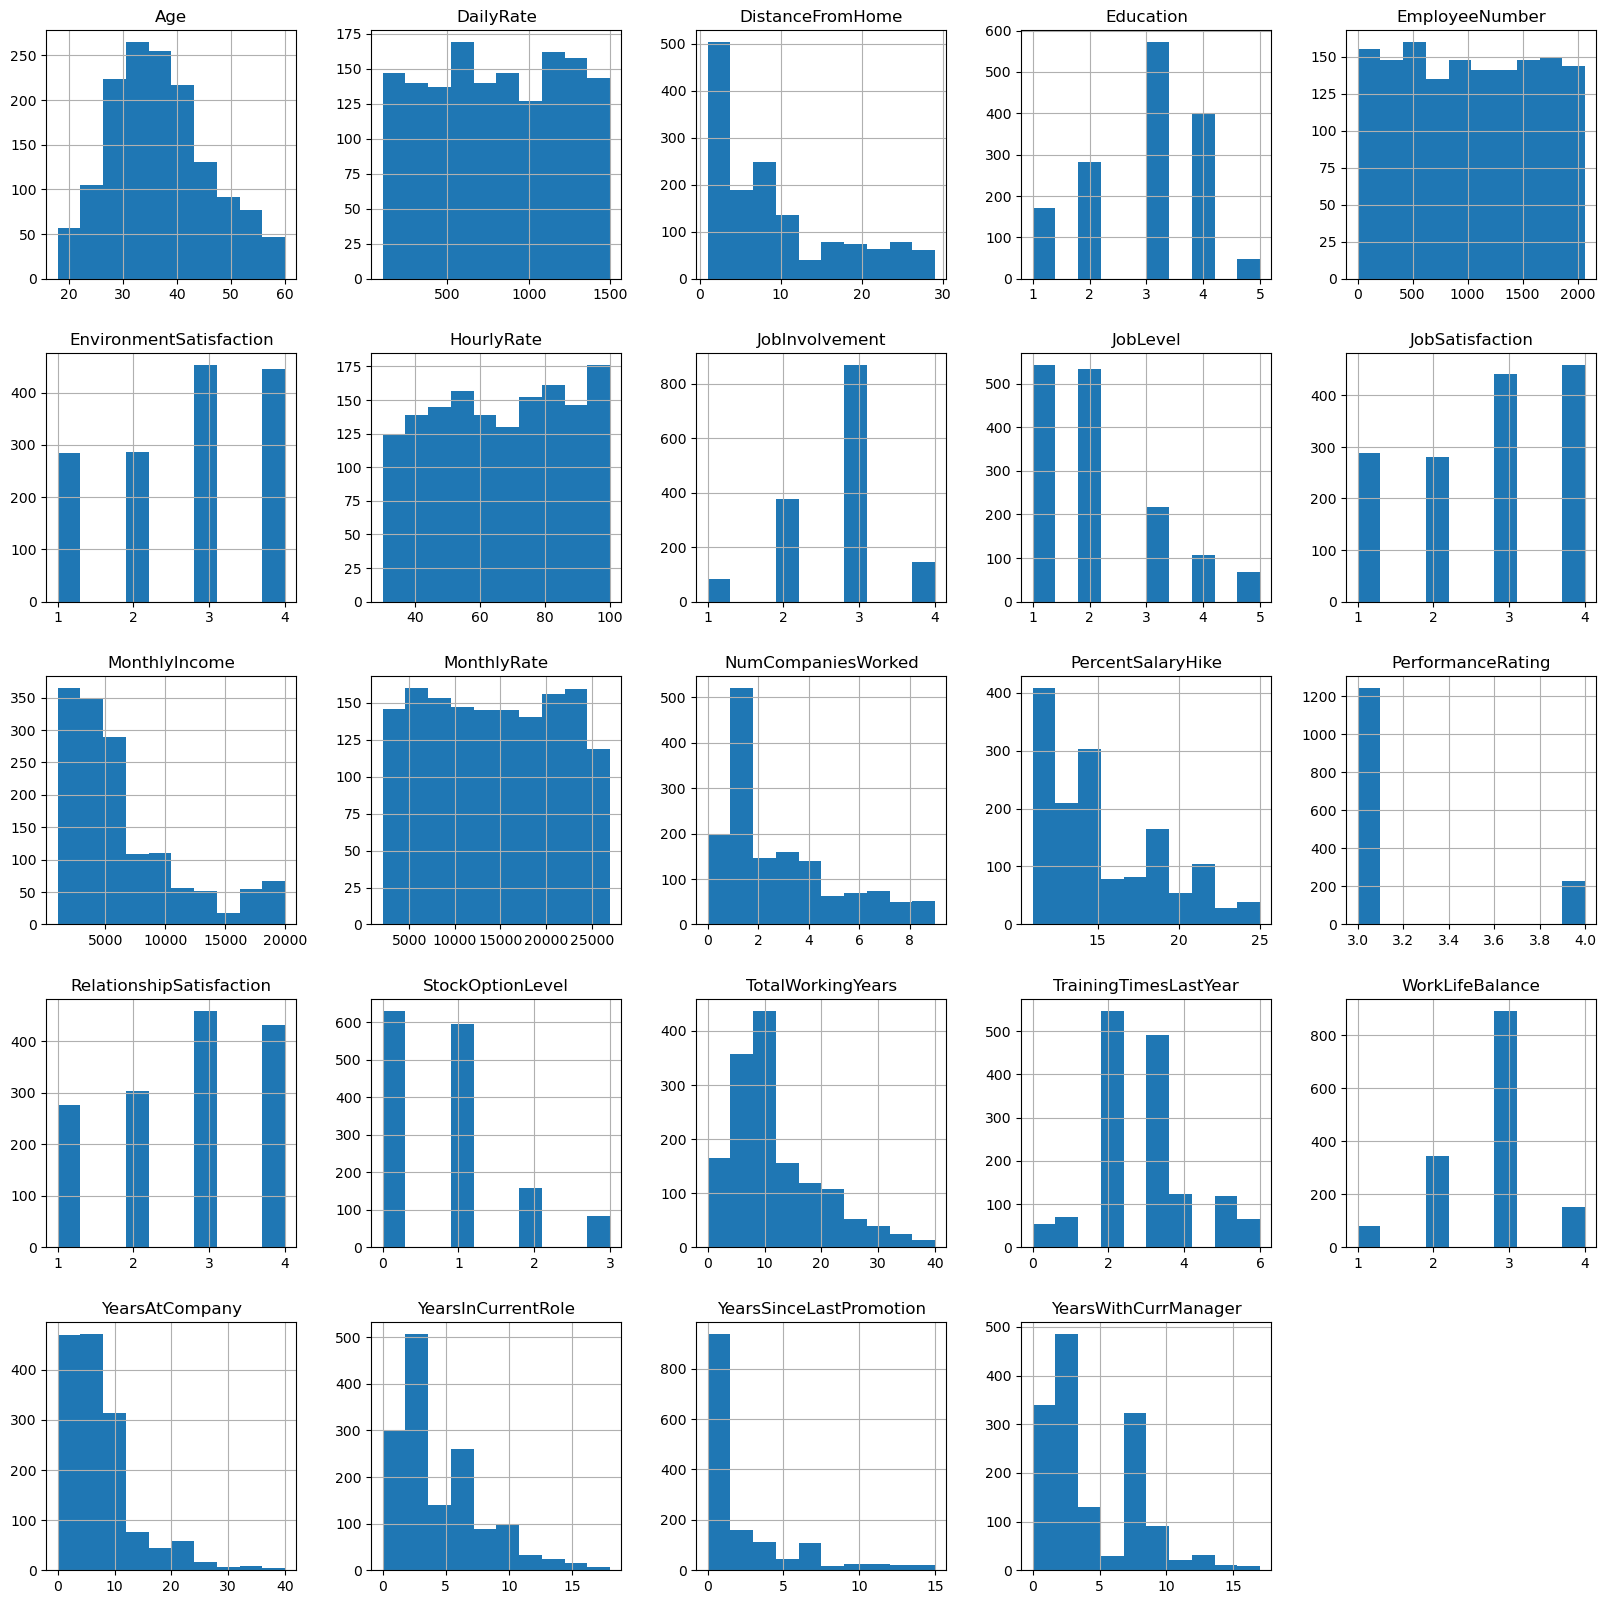

In [73]:
# Histogram for numerical variables

df[Numr].hist(figsize=(20,20))
plt.show()

In [74]:
df[Numr].nunique()

Age                           43
DailyRate                    886
DistanceFromHome              29
Education                      5
EmployeeNumber              1470
EnvironmentSatisfaction        4
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobSatisfaction                4
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
dtype: int64

To check skewness 

In [75]:
Numr_cont=['Age','DailyRate','DistanceFromHome','EmployeeNumber','HourlyRate','MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']
       
df[Numr_cont].skew()

Age                        0.413286
DailyRate                 -0.003519
DistanceFromHome           0.958118
EmployeeNumber             0.016574
HourlyRate                -0.032311
MonthlyIncome              1.369817
MonthlyRate                0.018578
NumCompaniesWorked         1.026471
PercentSalaryHike          0.821128
TotalWorkingYears          1.117172
TrainingTimesLastYear      0.553124
YearsAtCompany             1.764529
YearsInCurrentRole         0.917363
YearsSinceLastPromotion    1.984290
YearsWithCurrManager       0.833451
dtype: float64

Observation: DistanceFromHome, MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, TotalWorkingYears,YearsAtCompany,YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager have high skewness (>0.7)

In [ ]:
Box cox transformation

In [76]:
X=pd.DataFrame()
for i in ['DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears','YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']:
    transformed_data, lambda_value = boxcox(df[i]+0.01) 
    X[i]=transformed_data
    sk1=pd.Series(X[i]).skew()
    print(f'{i} = {sk1:.2f}')

DistanceFromHome = -0.06
MonthlyIncome = 0.03
NumCompaniesWorked = -0.24
PercentSalaryHike = 0.11
TotalWorkingYears = 0.00
YearsAtCompany = 0.01
YearsInCurrentRole = -0.42
YearsSinceLastPromotion = -0.13
YearsWithCurrManager = -0.45


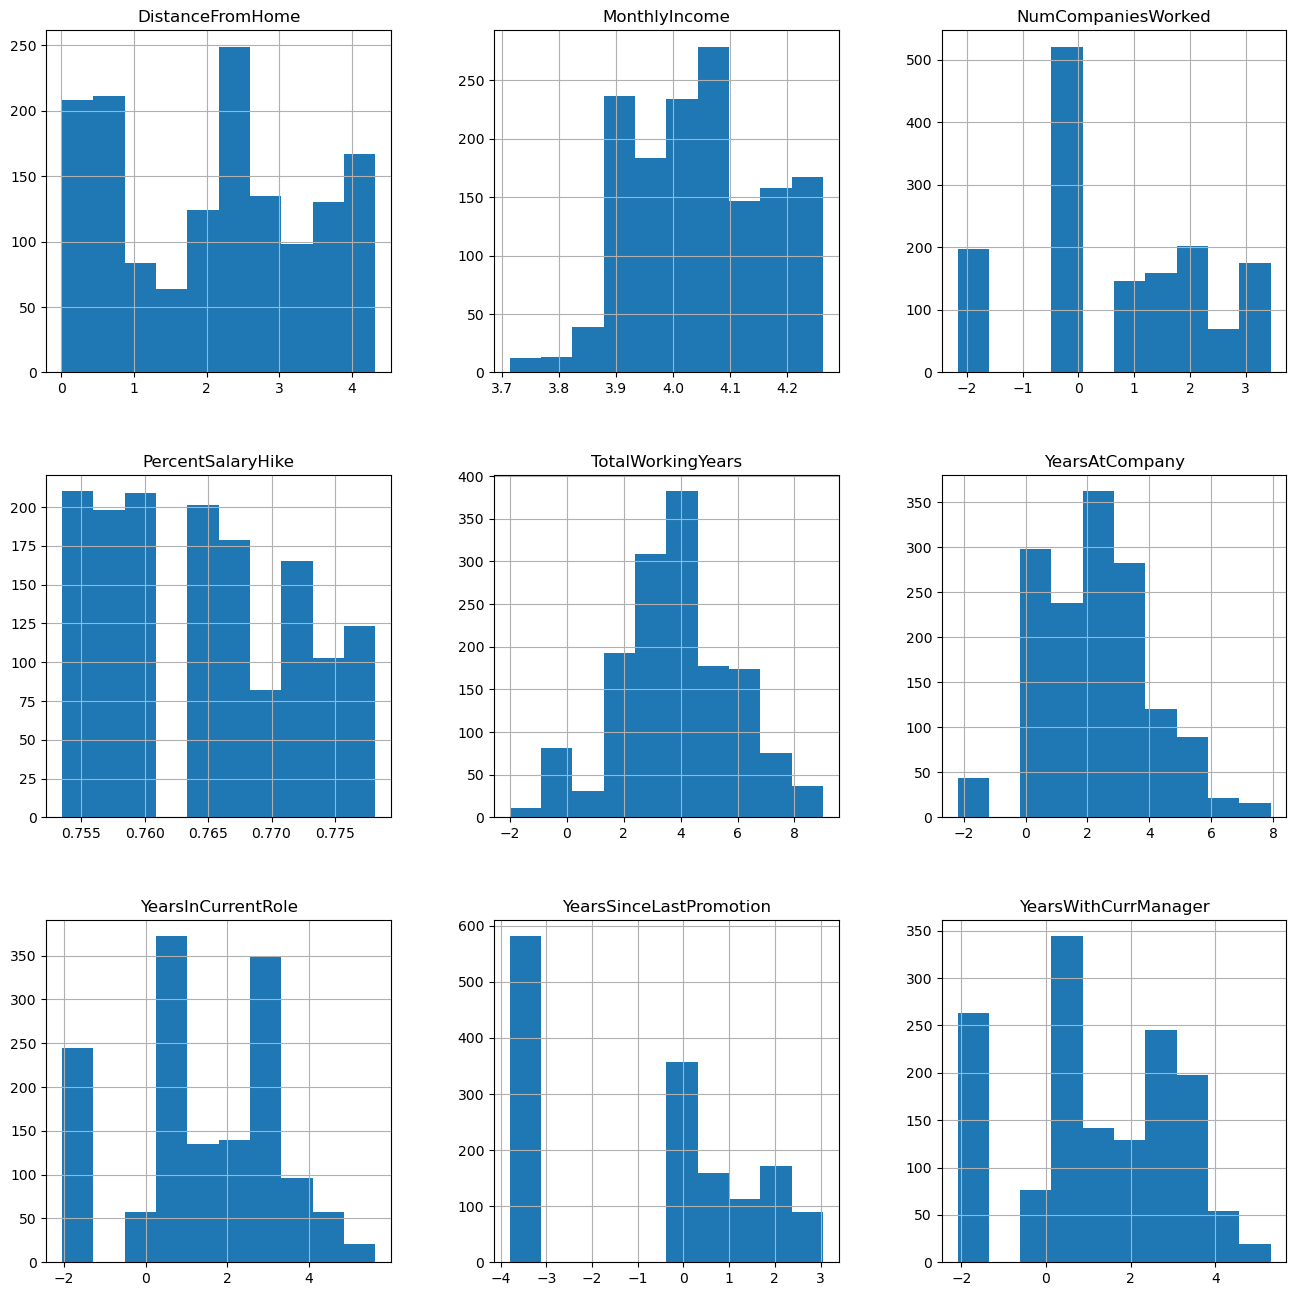

In [77]:
X[['DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears','YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].hist(figsize=(16,16))
plt.show()

***Replacing the highly skewed variables 

In [79]:
df1=df.drop(columns=['DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears','YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],inplace=False)
df2=pd.concat([df1,X],axis=1)


In [80]:
df2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,WorkLifeBalance,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,2,Life Sciences,1,2,Female,...,1,0.009957,4.080011,3.178760,0.753480,3.357805,2.551431,1.882352,-3.799740,2.272299
1,49,No,Travel_Frequently,279,Research & Development,1,Life Sciences,2,3,Male,...,3,2.420497,4.053053,0.009969,0.776661,3.928134,3.647236,3.006162,0.009955,2.962909
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,4,4,Male,...,3,0.733890,3.879542,2.576201,0.765874,3.041735,-2.201738,-2.044086,-3.799740,-2.087981
3,33,No,Travel_Frequently,1392,Research & Development,4,Life Sciences,5,4,Female,...,3,1.192776,3.947144,0.009969,0.753480,3.357805,3.142771,3.006162,1.156069,-2.087981
4,27,No,Travel_Rarely,591,Research & Development,1,Medical,7,1,Male,...,3,0.733890,3.981273,3.445265,0.757459,2.698690,0.797313,0.810609,0.719607,0.806720


In [81]:
# Skewness after transformation
df2[['DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears','YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']].skew()


DistanceFromHome          -0.059332
MonthlyIncome              0.032788
NumCompaniesWorked        -0.241150
PercentSalaryHike          0.111524
TotalWorkingYears          0.002736
YearsAtCompany             0.010052
YearsInCurrentRole        -0.423218
YearsSinceLastPromotion   -0.133212
YearsWithCurrManager      -0.445175
dtype: float64

Count plot for categorical variables

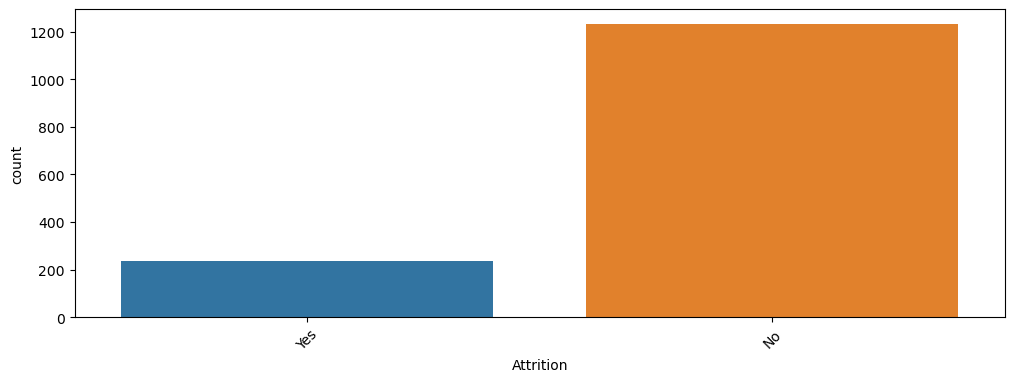

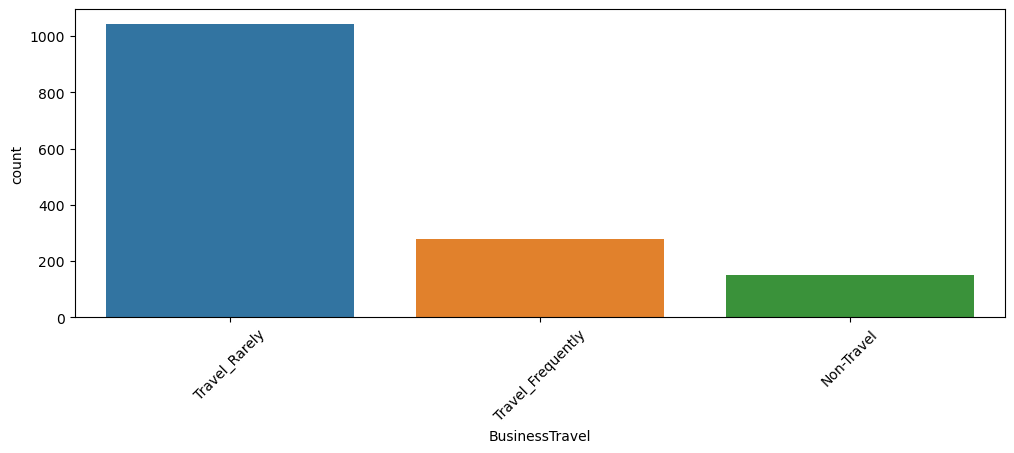

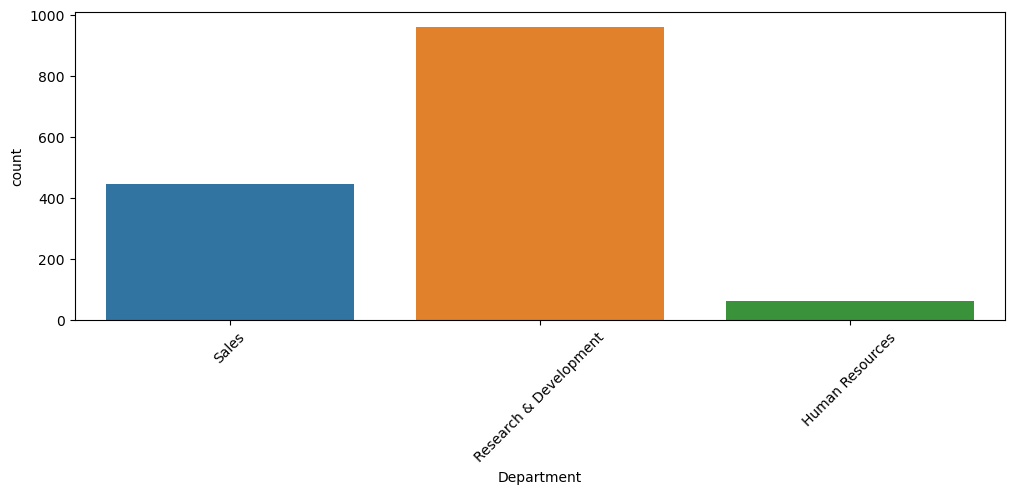

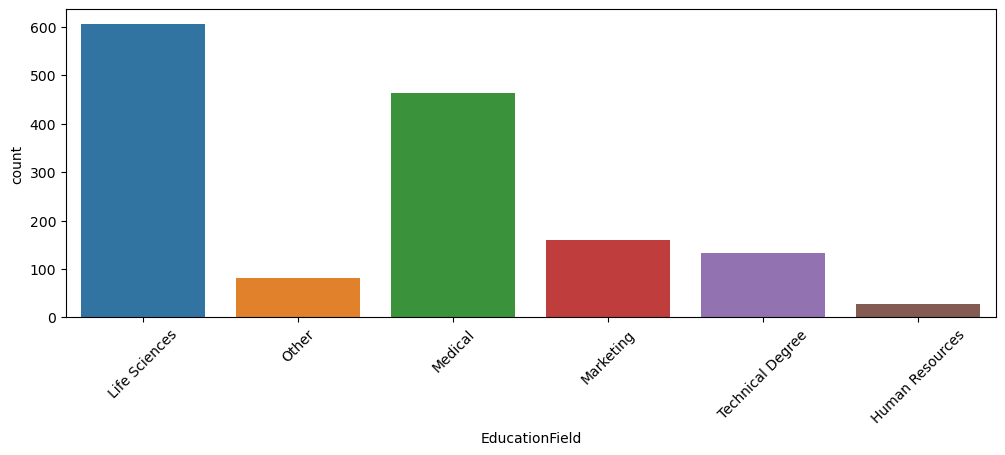

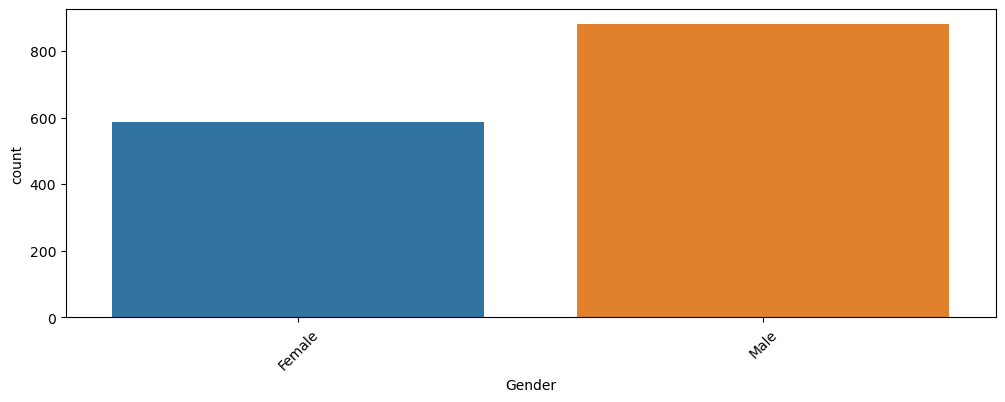

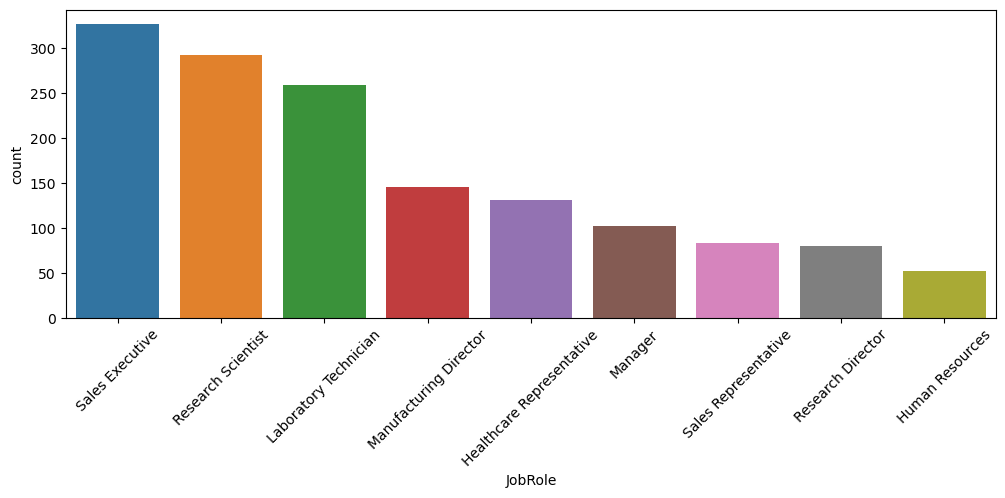

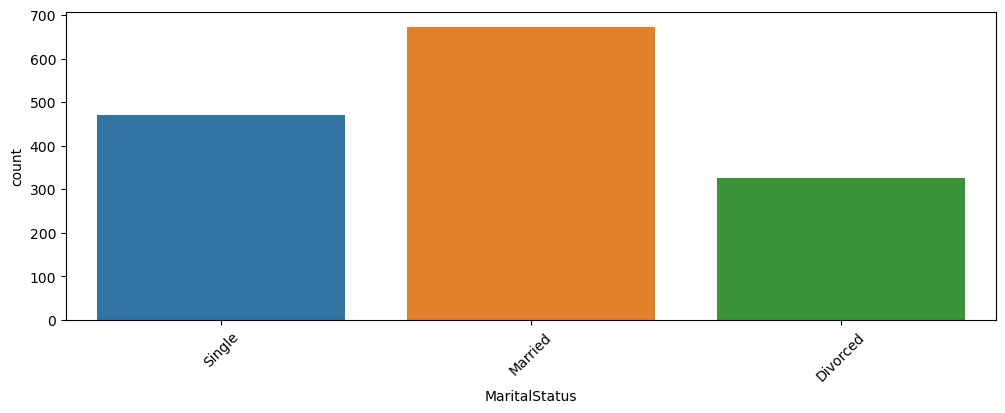

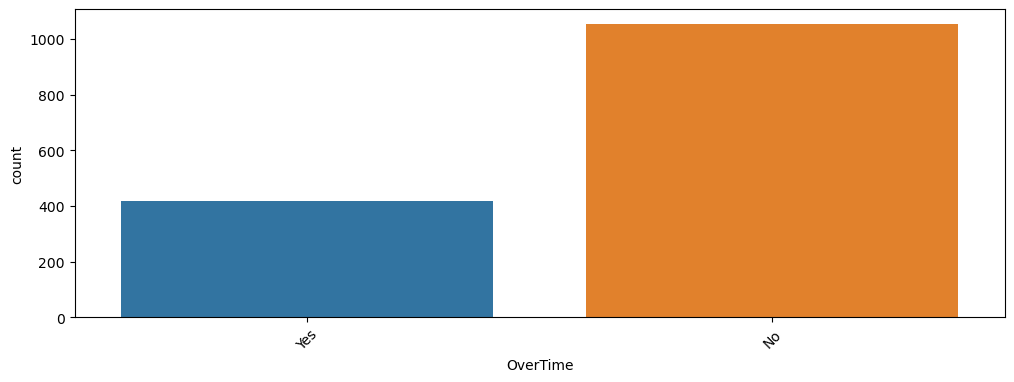

In [82]:
for i in df2[Catgr]:
    plt.figure(figsize=(12, 4))
    sns.countplot(x=i, data=df2)
    plt.xticks(rotation=45)
    plt.show()

Categorical to numerical transformation: One hot encoding

In [87]:
df_encod = pd.get_dummies(df2, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus','OverTime'],drop_first=True)
df_encod


,Age,Attrition,DailyRate,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,Yes,1102,2,1,2,94,3,2,4,...,0,0,0,0,0,1,0,0,1,1
1,49,No,279,1,2,3,61,2,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,Yes,1373,2,4,4,92,2,1,3,...,1,0,0,0,0,0,0,0,1,1
3,33,No,1392,4,5,4,56,3,1,3,...,0,0,0,0,1,0,0,1,0,1
4,27,No,591,1,7,1,40,3,1,2,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,884,2,2061,3,41,4,2,4,...,1,0,0,0,0,0,0,1,0,0
1466,39,No,613,1,2062,4,42,2,3,1,...,0,0,0,0,0,0,0,1,0,0
1467,27,No,155,3,2064,2,87,4,2,2,...,0,0,1,0,0,0,0,1,0,1
1468,49,No,1023,3,2065,4,63,2,2,2,...,0,0,0,0,0,1,0,1,0,0


# Mapping the labels of 'Attrition'

In [88]:
df_encod['Attrition']=df_encod['Attrition'].map({'No':0,'Yes':1})

In [89]:
len(df_encod.columns)

46

Observation: In the categorical to numerical encoded dataset, there are total 46 columns.Therefore, 22 new columns got created because of one hot encoding of the categorical variables.

# Correlation Analysis

Compute and visualize pairwise correlations between numerical variables using a correlation matrix or scatter plots. Identify highly correlated variables (correlation coefficient > 0.7 or < -0.7).


In [ ]:
# Pairwise correlations: Using heat map

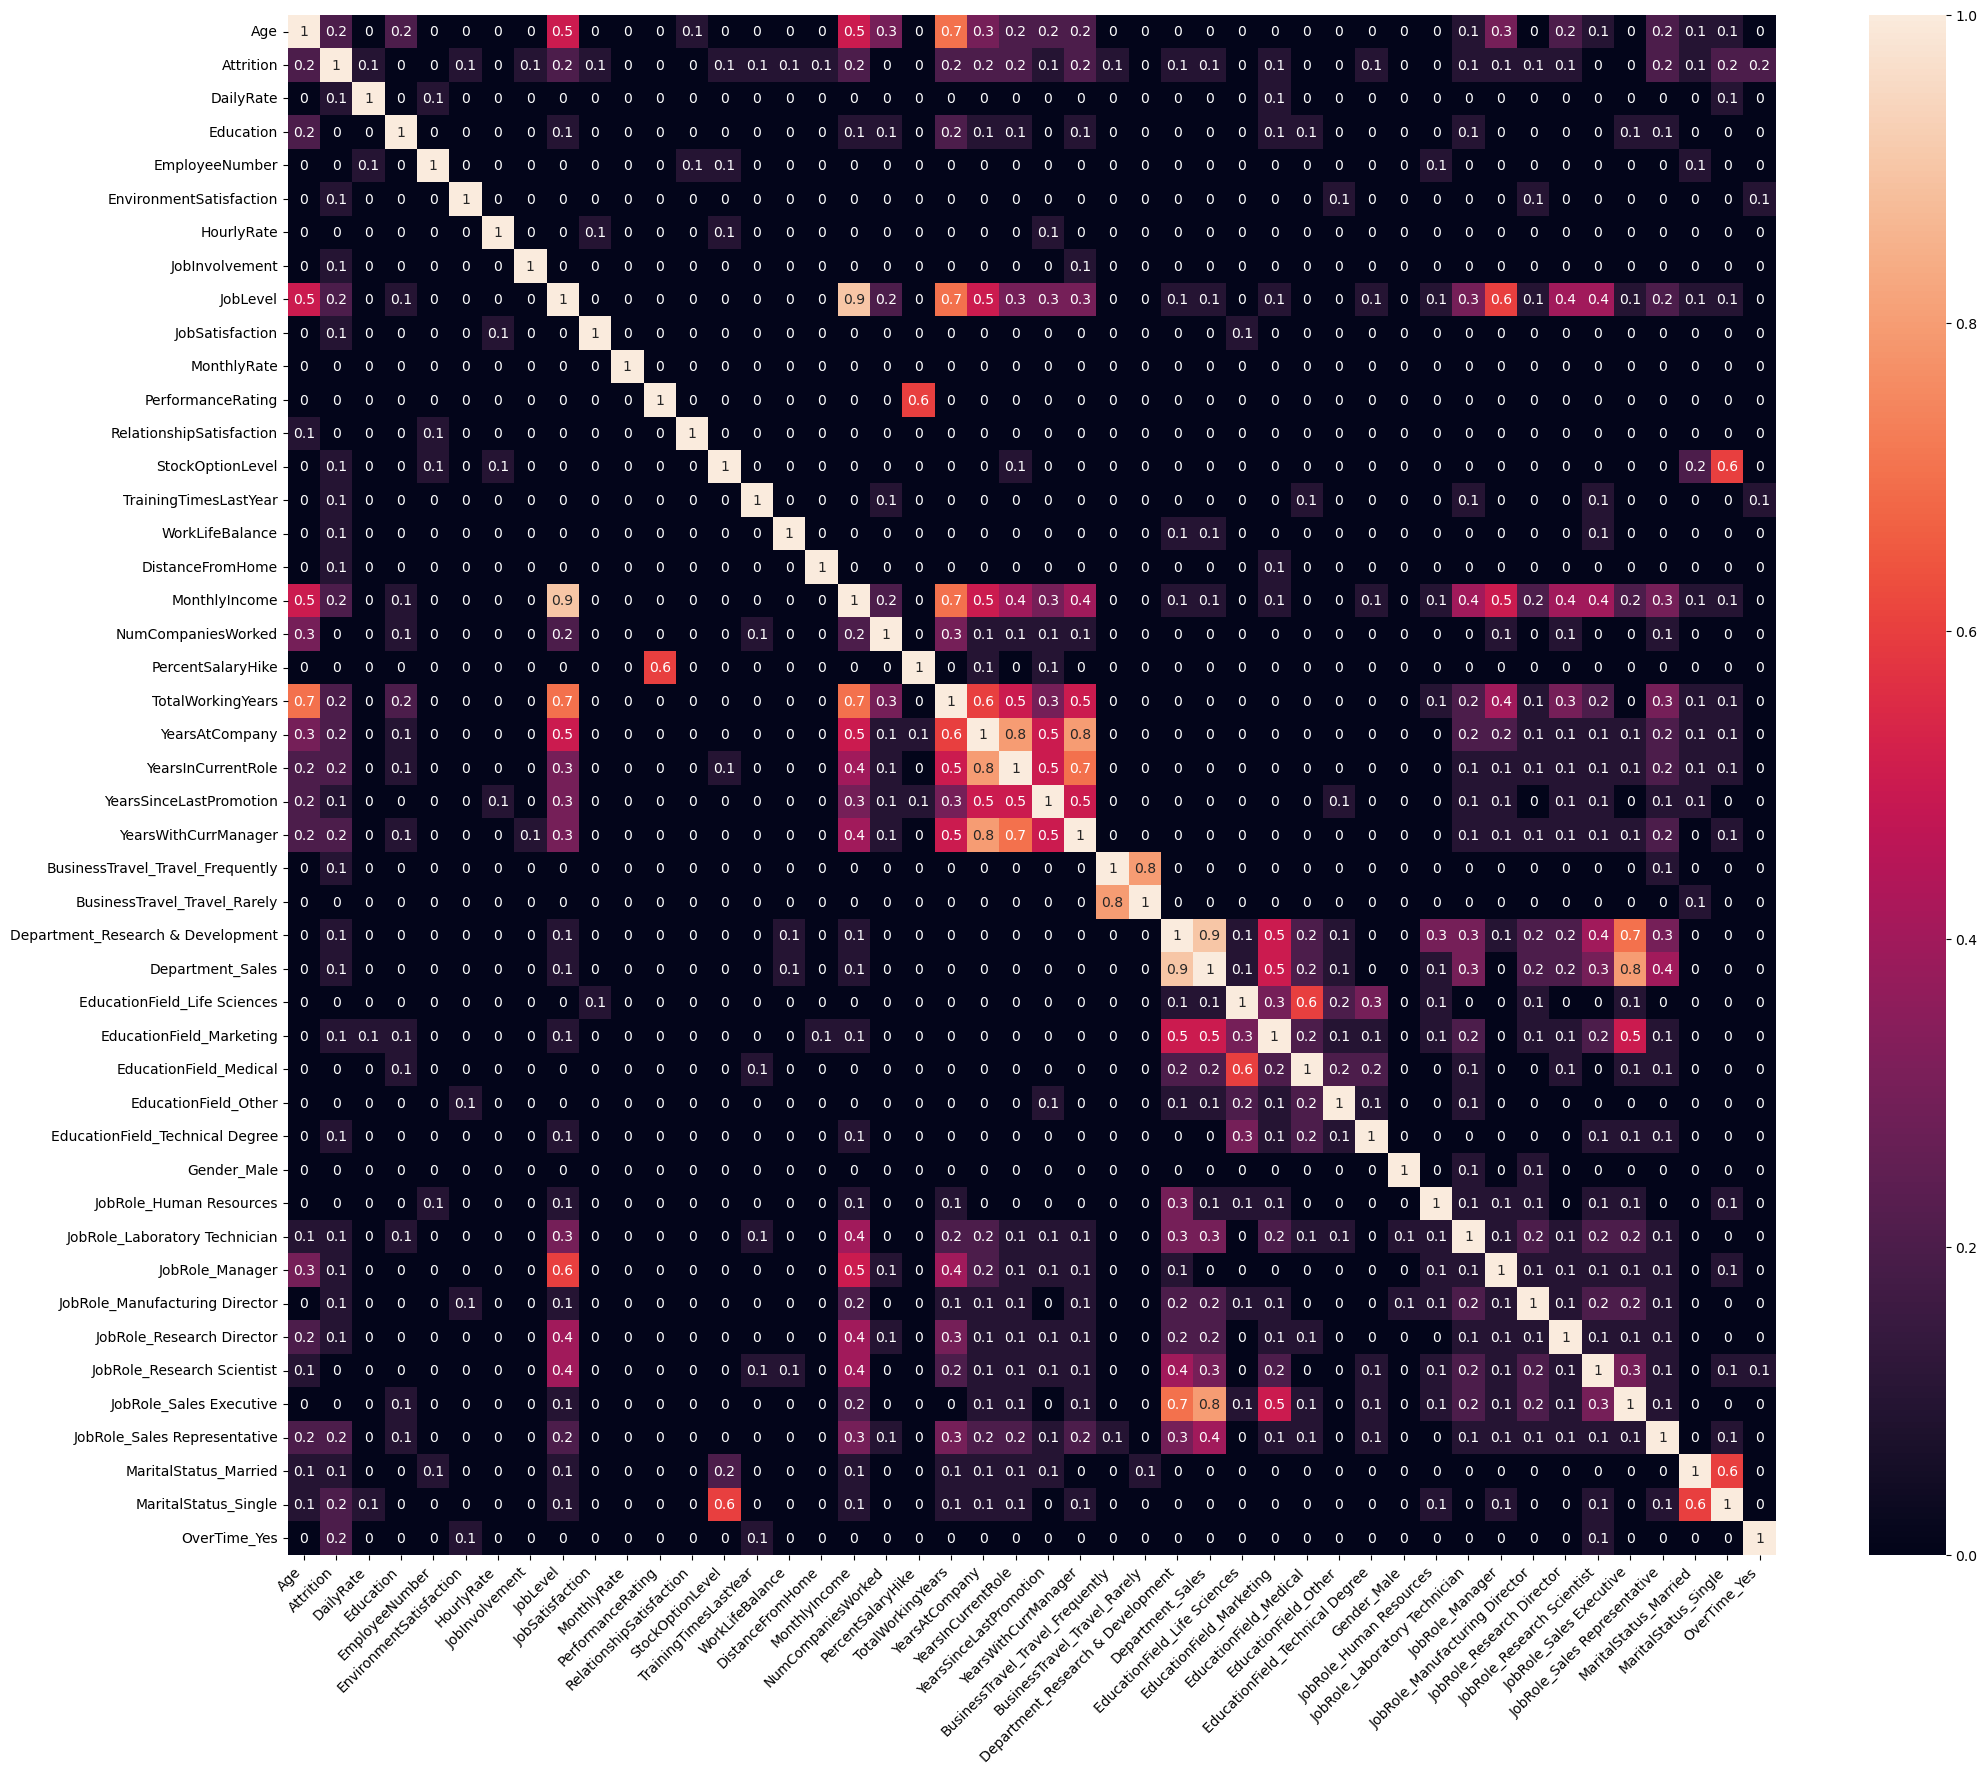

In [91]:
plt.figure(figsize=(24,20))
heatmap = sns.heatmap(round(abs(df_encod.corr()), 1), annot=True)

# Tilt x-axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
plt.show()

Observations:
(i) 'JobLevel' has very high correlation with 'MonthlyIncome' (corr = 0.9) and 'TotalWorkingYears' (corr = 0.7).
(ii) 'MonthlyIncome' has high correlation with 'TotalWorkingYears' (corr = 0.7).
(iii) 'YearsAtCompany' has high correlation with 'YearsInCurrentRole' (corr = 0.8) and 'YearsWithCurrManager' (corr = 0.8).
(iv) 'YearsInCurrentRole' has high correlation with 'YearsWithCurrManager' (corr = 0.7).
(v) 'BusinessTravel_Travel_Frequently' is highly correlated with 'BusinessTravel_Travel_Rarely' (corr = 0.8).
(vi) 'Department_Research & Development' is highly correlated with 'Department_Sales' (corr = 0.9).
(vii) 'JobRole_Sales Executive' is highly correlated with 'Department_Sales' (corr = 0.8).

# Variance Inflation Factor (VIF)

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=df_encod.drop(columns='Attrition',inplace=False)
y=df_encod['Attrition']
VIF=pd.DataFrame()
VIF["Features"]=X.columns
VIF["VIF value"]=[round(variance_inflation_factor(X.values, i),2) for i in range(len(X.columns))]
VIF

,Features,VIF value
0,Age,36.19
1,DailyRate,5.13
2,Education,9.88
3,EmployeeNumber,4.04
4,EnvironmentSatisfaction,7.44
5,HourlyRate,11.83
6,JobInvolvement,16.20
7,JobLevel,34.03
8,JobSatisfaction,7.31
9,MonthlyRate,5.16



**Observation: 'MonthlyIncome'(= 6387.71), and 'PercentSalaryHike'(= 6882.61) have very high VIF.

**Next: we first drop 'PercentSalaryHike' from the dataframe


***Dropping 'PercentSalaryHike' from the dataframe

In [95]:
df_encod.drop(columns='PercentSalaryHike',inplace=True)

In [96]:
len(df_encod.columns)

45

In [97]:
df_encod.head()

,Age,Attrition,DailyRate,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,2,1,2,94,3,2,4,...,0,0,0,0,0,1,0,0,1,1
1,49,0,279,1,2,3,61,2,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,4,4,92,2,1,3,...,1,0,0,0,0,0,0,0,1,1
3,33,0,1392,4,5,4,56,3,1,3,...,0,0,0,0,1,0,0,1,0,1
4,27,0,591,1,7,1,40,3,1,2,...,1,0,0,0,0,0,0,1,0,0


In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=df_encod.drop(columns='Attrition',inplace=False)
y=df_encod['Attrition']
VIF=pd.DataFrame()
VIF["Features"]=X.columns
VIF["VIF value"]=[round(variance_inflation_factor(X.values, i),2) for i in range(len(X.columns))]
VIF

,Features,VIF value
0,Age,35.95
1,DailyRate,5.13
2,Education,9.88
3,EmployeeNumber,4.04
4,EnvironmentSatisfaction,7.41
5,HourlyRate,11.83
6,JobInvolvement,16.14
7,JobLevel,28.74
8,JobSatisfaction,7.30
9,MonthlyRate,5.16



***Observation: Clearly the VIF has considerably reduced of most of the variables. However, VIF of 'MonthlyIncome' is still very high.

***Next: To drop 'MonthlyIncome' from the data frame


In [99]:
df_encod.drop(columns='MonthlyIncome',inplace=True)

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=df_encod.drop(columns='Attrition',inplace=False)
y=df_encod['Attrition']
VIF=pd.DataFrame()
VIF["Features"]=X.columns
VIF["VIF value"]=[round(variance_inflation_factor(X.values, i),2) for i in range(len(X.columns))]
VIF

,Features,VIF value
0,Age,35.29
1,DailyRate,5.09
2,Education,9.68
3,EmployeeNumber,4.00
4,EnvironmentSatisfaction,7.29
5,HourlyRate,11.58
6,JobInvolvement,15.60
7,JobLevel,26.03
8,JobSatisfaction,7.17
9,MonthlyRate,5.10


**Observation: Clearly the VIF has considerably reduced of most of the variables. However, VIF of some variables is still very high.
**Dropping more variables can lead to significant information loss. Therefore this will be taken care of by regularization during model building.
**Scaling: Univariate Analysis

In [101]:
df_encod.describe()

,Age,Attrition,DailyRate,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.457823,0.319728,0.282993
std,9.135373,0.367863,403.509100,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891,0.498387,0.466530,0.450606
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,802.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,0.000000,1157.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,60.000000,1.000000,1499.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Observation: 'DailyRate' and 'EmployeeNumber' have different range compared to some other variables.

**Next: To scale all the variables within similar range, we will use "Standard Scaler"

In [102]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X1=df_encod.drop(columns='Attrition',inplace=False)
X2=scale.fit_transform(X1)
X3=pd.DataFrame(X2,columns=X1.columns)
X3.describe()

,Age,DailyRate,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
count,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,...,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03
mean,-3.504377e-17,5.075305e-17,7.008755e-17,-1.546760e-16,1.305078e-16,1.691768e-16,6.525392e-17,-2.658493e-17,-9.183886e-17,3.021015e-17,...,-8.338001e-17,4.350262e-17,-4.350262e-17,5.256566e-17,-4.471102e-17,1.208406e-18,1.450087e-17,1.208406e-16,-4.471102e-17,-4.350262e-17
std,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,...,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00
min,-2.072192e+00,-1.736576e+00,-1.868426e+00,-1.701283e+00,-1.575686e+00,-1.766079e+00,-2.432006e+00,-9.614864e-01,-1.567907e+00,-1.717284e+00,...,-4.624639e-01,-2.730593e-01,-3.308080e-01,-2.399041e-01,-4.978732e-01,-5.338212e-01,-2.446250e-01,-9.189214e-01,-6.855655e-01,-6.282411e-01
25%,-7.581700e-01,-8.366616e-01,-8.916883e-01,-8.866700e-01,-6.605307e-01,-8.803615e-01,-1.026167e+00,-9.614864e-01,-6.608532e-01,-8.806440e-01,...,-4.624639e-01,-2.730593e-01,-3.308080e-01,-2.399041e-01,-4.978732e-01,-5.338212e-01,-2.446250e-01,-9.189214e-01,-6.855655e-01,-6.282411e-01
50%,-1.011589e-01,-1.204135e-03,8.504925e-02,-7.253514e-03,2.546249e-01,5.355811e-03,3.796721e-01,-5.778755e-02,2.462002e-01,-1.090645e-02,...,-4.624639e-01,-2.730593e-01,-3.308080e-01,-2.399041e-01,-4.978732e-01,-5.338212e-01,-2.446250e-01,-9.189214e-01,-6.855655e-01,-6.282411e-01
75%,6.653541e-01,8.788772e-01,1.061787e+00,8.821327e-01,1.169781e+00,8.787715e-01,3.796721e-01,8.459113e-01,1.153254e+00,8.641014e-01,...,-4.624639e-01,-2.730593e-01,-3.308080e-01,-2.399041e-01,-4.978732e-01,-5.338212e-01,-2.446250e-01,1.088232e+00,1.458650e+00,1.591746e+00
max,2.526886e+00,1.726730e+00,2.038524e+00,1.733302e+00,1.169781e+00,1.678377e+00,1.785511e+00,2.653309e+00,1.153254e+00,1.782888e+00,...,2.162331e+00,3.662208e+00,3.022901e+00,4.168333e+00,2.008543e+00,1.873287e+00,4.087890e+00,1.088232e+00,1.458650e+00,1.591746e+00


**Observation: All the variables are now scaled within similar range.

**To check class balance

In [103]:
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

Observation: The class "0" ("No") is present in majority .

Next: To balance the classes

**SMOTE: To balance the classes


In [104]:
from imblearn.over_sampling import SMOTE
ST=SMOTE()
X3,y = ST.fit_resample(X3,y)

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [ ]:
Model Building

In [106]:
# Import Classification libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV

In [ ]:
# Logistic Regression
# Random state: To find the best one

In [107]:
from sklearn.model_selection import train_test_split
maxAcc=0
for i in range(1000):
    X_train,X_test,y_train,y_test = train_test_split(X3,y, test_size=0.3,random_state=i)
    LR=LogisticRegression()
    model=LR.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    Acc=accuracy_score(y_test,y_pred)
    if Acc>maxAcc:
        maxAcc=Acc
        random=i
print(f'Max accuracy: {round(maxAcc,2)}')
print(f'Best_random_state: {random}')

Max accuracy: 0.92
Best_random_state: 123


In [ ]:
Observation: Random state (in range of 1000) with best accuracy is 123

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X3,y, test_size=0.3,random_state=random)
LR=LogisticRegression()
model=LR.fit(X_train,y_train)
y_pred=model.predict(X_test)
Acc=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
cv_score=cross_val_score(LR,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {round(Acc,3)}')
print(f'Cross validation score: {round(cv_score,3)}')
print(f'Classification report:\n {report}')
print(f'Confusion matrix:\n {conf_matrix}')

Accuracy score : 0.916
Cross validation score: 0.862
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       384
           1       0.74      0.54      0.63        57

    accuracy                           0.92       441
   macro avg       0.84      0.76      0.79       441
weighted avg       0.91      0.92      0.91       441

Confusion matrix:
 [[373  11]
 [ 26  31]]


# Decision Tree Classifier

In [109]:
X_train,X_test,y_train,y_test = train_test_split(X3,y, test_size=0.3,random_state=random)
DT=DecisionTreeClassifier()
model=DT.fit(X_train,y_train)
y_pred=model.predict(X_test)
Acc=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
cv_score=cross_val_score(DT,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {round(Acc,3)}')
print(f'Cross validation score: {round(cv_score,3)}')
print(f'Classification report:\n {report}')
print(f'Confusion matrix:\n {conf_matrix}')

Accuracy score : 0.76
Cross validation score: 0.743
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86       384
           1       0.24      0.39      0.29        57

    accuracy                           0.76       441
   macro avg       0.57      0.60      0.57       441
weighted avg       0.81      0.76      0.78       441

Confusion matrix:
 [[313  71]
 [ 35  22]]


# Random Forest Classifier

In [111]:
X_train,X_test,y_train,y_test = train_test_split(X3,y, test_size=0.3,random_state=random)
RF=RandomForestClassifier()
model=RF.fit(X_train,y_train)
y_pred=model.predict(X_test)
Acc=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
cv_score=cross_val_score(RF,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {round(Acc,3)}')
print(f'Cross validation score: {round(cv_score,3)}')
print(f'Classification report:\n {report}')
print(f'Confusion matrix:\n {conf_matrix}')

Accuracy score : 0.898
Cross validation score: 0.838
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       384
           1       0.83      0.26      0.40        57

    accuracy                           0.90       441
   macro avg       0.87      0.63      0.67       441
weighted avg       0.89      0.90      0.87       441

Confusion matrix:
 [[381   3]
 [ 42  15]]


# AdaBoost Classifier

In [112]:
X_train,X_test,y_train,y_test = train_test_split(X3,y, test_size=0.3,random_state=random)
AB=AdaBoostClassifier()
model=AB.fit(X_train,y_train)
y_pred=model.predict(X_test)
Acc=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
cv_score=cross_val_score(AB,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {round(Acc,3)}')
print(f'Cross validation score: {round(cv_score,3)}')
print(f'Classification report:\n {report}')
print(f'Confusion matrix:\n {conf_matrix}')

Accuracy score : 0.905
Cross validation score: 0.85
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       384
           1       0.68      0.49      0.57        57

    accuracy                           0.90       441
   macro avg       0.81      0.73      0.76       441
weighted avg       0.90      0.90      0.90       441

Confusion matrix:
 [[371  13]
 [ 29  28]]


# Gradient Boosting Classifier

In [113]:
X_train,X_test,y_train,y_test = train_test_split(X3,y, test_size=0.3,random_state=random)
GB=GradientBoostingClassifier()
model=GB.fit(X_train,y_train)
y_pred=model.predict(X_test)
Acc=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
cv_score=cross_val_score(GB,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {round(Acc,3)}')
print(f'Cross validation score: {round(cv_score,3)}')
print(f'Classification report:\n {report}')
print(f'Confusion matrix:\n {conf_matrix}')

Accuracy score : 0.887
Cross validation score: 0.849
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.94       384
           1       0.63      0.30      0.40        57

    accuracy                           0.89       441
   macro avg       0.77      0.64      0.67       441
weighted avg       0.87      0.89      0.87       441

Confusion matrix:
 [[374  10]
 [ 40  17]]


# Support Vector Classifier

In [114]:
X_train,X_test,y_train,y_test = train_test_split(X3,y, test_size=0.3,random_state=random)
SV=SVC()
model=SV.fit(X_train,y_train)
y_pred=model.predict(X_test)
Acc=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
cv_score=cross_val_score(SV,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {round(Acc,3)}')
print(f'Cross validation score: {round(cv_score,3)}')
print(f'Classification report:\n {report}')
print(f'Confusion matrix:\n {conf_matrix}')

Accuracy score : 0.898
Cross validation score: 0.848
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       384
           1       0.88      0.25      0.38        57

    accuracy                           0.90       441
   macro avg       0.89      0.62      0.66       441
weighted avg       0.90      0.90      0.87       441

Confusion matrix:
 [[382   2]
 [ 43  14]]


# K Neighbors Classifier

In [117]:
X_train,X_test,y_train,y_test = train_test_split(X3,y, test_size=0.3,random_state=random)
KN=KNeighborsClassifier()
model=KN.fit(X_train,y_train)
y_pred= model.predict(X_test)
Acc=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
cv_score=cross_val_score(KN,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {round(Acc,3)}')
print(f'Cross validation score: {round(cv_score,3)}')
print(f'Classification report:\n {report}')
print(f'Confusion matrix:\n {conf_matrix}')

AttributeError: 'Flags' object has no attribute 'c_contiguous'

Hyperparameter tuning of Random Forest Classifier using GridSearchCV
Currently used hyperparameters by Random Forest Classifier

In [118]:
print('Parameters currently in use:\n')
GridSearchCV.get_params(RandomForestClassifier())

Parameters currently in use:



{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [119]:
from sklearn.model_selection import GridSearchCV
RF1=RandomForestClassifier()

hp={'bootstrap': [True],                # each tree is built using a bootstrap sample of the training data
 'ccp_alpha': [0, 0.01, 0.1, 1.0],       # to control the complexity of the tree by pruning
 'class_weight': [None],                 # set to none as both classes are balanced
 'criterion': ['gini','entropy'],
 'max_depth': [2,6,10,14,18,20,22,24],   # maximum depth of each decision tree in the forest
 'max_features': ['auto'],
 'max_leaf_nodes': [None],
 'max_samples': [None],
 'min_impurity_decrease': [0.0],      # minimum impurity decrease required to split a node further
 'min_samples_leaf': [1],
 'min_samples_split': [2,3,5,10],
 'min_weight_fraction_leaf':[0.0],
 'n_estimators': [100,200,300],      # number of base learners (trees) to be included in the ensemble
 'n_jobs': [-1],                     # Utilize all available cores
 'oob_score': [False],               # average of the prediction accuracy on each out-of-bag sample across all trees in the forest.
 'random_state': [random],
 'verbose': [0],
 'warm_start': [True]}                # to reuse the existing solution and continue training an ensemble method from where it left off
grid_search=GridSearchCV(RF1,param_grid=hyp,cv=5)
grid_search.fit(X_train,y_train)

print("Best parameters:", grid_search.best_params_)
print("Best estimators:", grid_search.best_estimator_)
print("Best score:", round(grid_search.best_score_,3))

ValueError: 
All the 3840 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3840 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


In [120]:
import pickle
X_train,X_test,y_train,y_test = train_test_split(X3,y, test_size=0.3,random_state=random)
RF=RandomForestClassifier()
model=RF.fit(X_train,y_train)
y_pred=model.predict(X_test)
Acc=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
cv_score=cross_val_score(RF,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {round(Acc,3)}')
print(f'Cross validation score: {round(cv_score,3)}')
print(f'Classification report:\n {report}')
print(f'Confusion matrix:\n {conf_matrix}')
file_name='HR Analytics.pkl'
pickle.dump(RF,open(file_name,'wb'))

Accuracy score : 0.898
Cross validation score: 0.842
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       384
           1       0.83      0.26      0.40        57

    accuracy                           0.90       441
   macro avg       0.87      0.63      0.67       441
weighted avg       0.89      0.90      0.87       441

Confusion matrix:
 [[381   3]
 [ 42  15]]


Loading the saved model

In [122]:
loaded_model=pickle.load(open('HR Analytics.pkl','rb'))
result=loaded_model.score(X_test,y_test)
print(round(result,3))

0.898
